# Take-home exam

Candidate number:15064716

Organization of the notebook:

I was slightly surprised by the amount of code I had to write to complete the computations, so I tried to make the code cells in such a way that they can be mostly skipped, giving conclusions/descriptions in output and text cells. One notable exception to this is the Helmholtz utility and partition function(Beta,N) in part d), both computed within(very short) code cells. The reason for this is that I calculate the one-agent partition function as a separate object, and there's no need then to 'carry forward' the partition function and Helmholtz utility, as the only task was to compute them and are not analyzed further.


# Part a)

a_gr() is the function I pass 1/m as a parameter, the three random graph according to the specification provided can be seen below. The distribution I draw from is poisson with lambda = 3. What the randomly generated variable negative_helper (from uniform distribution) does is to ensure that in expectation, 5% of these weights is negative. The self-loop issue that would normally be solved by subtracting an identity matrix from adjacency matrix is taken care_of automatically by 
nx.fast_gnp_random_graph, while the fact that the matrix is generally non-symmetric is done by passing directed = True. I then proceed to assign weights and visualize the graphs, along with the respective adjacency matrices(weighted)

Negative weights are visualized by purple edges and the positive ones by yellow

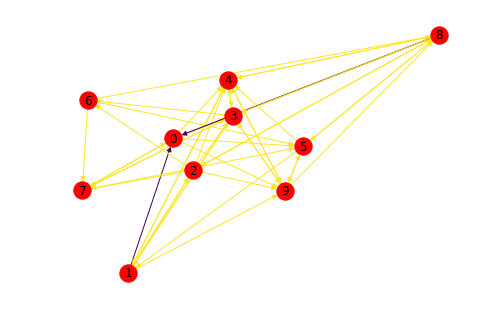

[[ 0  0  0  6  3  2  0 11  3  5]
 [-2  0  4  1  1  0  0  0  0  2]
 [ 0  3  0  2  2  0  1  4  6  2]
 [ 1  0  0  0  2  0  3  4  6  5]
 [ 0  2  0  6  0  0  0  0  4  1]
 [ 0  3  0  0  6  0  0  0  4  2]
 [ 0  0  0  0  0  3  0  2  2  0]
 [ 1  0  0  5  0  4  0  0  0  0]
 [-7  0  0  2  3  4  0  0  0  0]
 [ 0  0  0  0  2  2  0  0  4  0]]


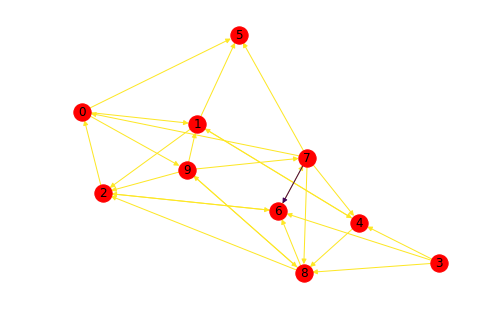

[[ 0  2  0  0  0  2  0  0  0  0]
 [ 0  0  6  0  1  4  0  0  0  0]
 [ 5  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  6  0  2  0  5  0]
 [ 0  2  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  4  0  0]
 [ 3  0  0  0  5  6 -3  0  5  0]
 [ 0  0  4  0  0  0  5  0  0  0]
 [ 0  5  2  0  0  0  0  2  0  0]]


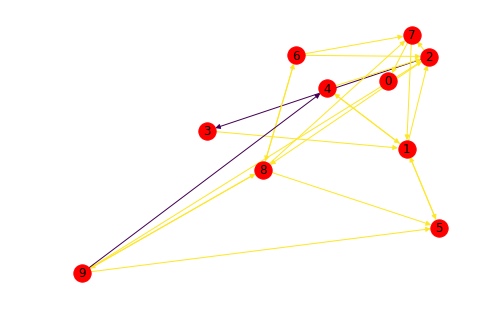

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  2  5  0  0  0  0]
 [ 0  0  0 -2  0  0  0  2  2  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0  3  5  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  5  2  0]
 [ 1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  4  3  0  6]
 [ 0  0  2  0 -7  5  0  0  1  0]]


In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def a_gr(prob, n_):
    gr1 = nx.fast_gnp_random_graph(n=n_,p=prob, directed = True) # initialize with n and m
    edge_colors = []
    for (u, v) in gr1.edges():
        random_weight = np.random.poisson(lam = 3)
        negative_helper = np.random.rand()
        if negative_helper>=0.95:
            random_weight = random_weight*(-1)
            edge_colors.append(4)
        else:
            edge_colors.append(7)
        gr1.edges[u,v]['weight'] = random_weight
    
    adj = nx.adjacency_matrix(gr1)
    nx.draw(gr1, with_labels = True, edge_color = edge_colors)
    plt.show()

    print adj.todense()

    
a_gr(0.5,10)
a_gr(0.33,10)
a_gr(0.25,10)

# Part b)

We find in-degrees of a network by multiplying transpose of the adjacency matrix by the adjacency matrix (from the right) and looking at the diagonal of the product to find the out-degrees; where the j-th element of that vector(the diagonal) is the out-degree of node j.

The procedure is indntical for out-degrees, with the only difference being multiplying transpose of the adjacency matrix from the right

->For n=250 and m = 3, i.e. prob = 1/3:

C:\Users\Jakub\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jakub\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


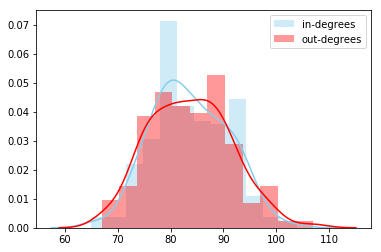

In [236]:
import seaborn as sns
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
def b_gr(prob, n_):
    gr1 = nx.fast_gnp_random_graph(n=n_,p=prob, directed = True) # initialize with n and m
    global adj_
    adj_ = nx.adjacency_matrix(gr1)
    for (u, v) in gr1.edges():
        random_weight = np.random.poisson(lam = 3)
        negative_helper = np.random.rand()
        if negative_helper>=0.96:
            random_weight = random_weight*(-1)
        gr1.edges[u,v]['weight'] = random_weight
    global adj
    adj = nx.adjacency_matrix(gr1)
    A_deg_out = np.dot(adj_, np.transpose(adj_))
    A_deg_in = np.dot(np.transpose(adj_),adj_)
    a_out = np.diag(A_deg_out.todense())
    a_in = np.diag(A_deg_in.todense())
    #print A_deg_in == A_deg_out
    to_hist_in = []
    to_hist_out = []

    #for i in range(250):
        #to_hist_in.append(A_deg_in[i])
        #to_hist_out.append(A_deg_out[i])
    sns.distplot(a_in , color="skyblue", label="in-degrees")
    sns.distplot(a_out , color="red", label="out-degrees")
    plt.legend()
b_gr(0.333333,250)

->For n=250 and m = 4, i.e. prob == 1/4:
We see the distribution shifted to the left as expected, as there's 1/3-1/4 less probability of a connection between the nodes.

C:\Users\Jakub\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jakub\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


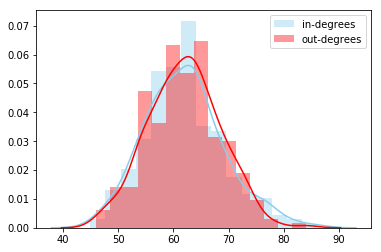

In [238]:
def b_gr(prob, n_):
    gr2 = nx.fast_gnp_random_graph(n=n_,p=prob, directed = True) # initialize with n and m
    global adj2_
    adj2_ = nx.adjacency_matrix(gr2)
    for (u, v) in gr2.edges():
        random_weight = np.random.poisson(lam = 3)
        negative_helper = np.random.randn()
        if negative_helper>=0.96:
            random_weight = random_weight*(-1)
        gr2.edges[u,v]['weight'] = random_weight
    adj2 = nx.adjacency_matrix(gr2)
    A_deg_in = np.diag(np.dot(adj2_, np.transpose(adj2_)).todense())
    # here, we can verify that the respective in and out degrees are the same
    global A_deg_out
    A_deg_out = np.diag(np.dot(np.transpose(adj2_),adj2_).todense())
    #print A_deg_in == A_deg_out
            
    sns.distplot(A_deg_in , color="skyblue", label="in-degrees")
    sns.distplot(A_deg_out , color="red", label="out-degrees")
    plt.legend()

b_gr(0.25,250)

Axioms, and assumptions in general can be thought of having zero in-degrees. A more applied example from Operations Research would be the 'production' node of the logistics network of say, a large online retail company. There, the product is created and there's no flow to it from the perspective of delivery, since the product really didn't exist before

Zero out-degrees can be expected when a new discovery is made. At that very moment, there are no out-degrees since there's no work building up on that dicovery. A relatively recent example would be the discovery of Generative Adversarial Nets.


Part c)

This would formalize the tradeoff between the puzzles a researcher is interested in, collected into a vector h (portfolio holdings), and the 'relevant' puzzles represented by vector r. Optimally, the reseracher chooses these simultaneously, so we maximize:
                        r·A·h
                        ,subject to r·h = 1; since these are both relative measures
                        
We can either obtain the results by solving FOC directly, or by computing the left and right eigenvectors of the adjacency matrix A and recognize that the ones corresponding to the largest eigenvalues in both cases are what gives the optimal solution. The later one is preffered here, as it doesn't require symbolic python. Since the expression is to be maximized, we look at the eigenvalues corresponding to the largest eigenvalue in both cases

In [6]:
import scipy
A = adj_.todense()
A[1]
holdings1 = scipy.linalg.eigh(A, eigvals = (249,249))[1]

The above computes the right eigenvector by default. To compute the left one, we repeat the procedure with the transpose of the adjecency matrix A

In [7]:
global rel_relevances1
rel_relevances1 = scipy.linalg.eigh(np.transpose(A), eigvals = (249,249))[1]

C:\Users\Jakub\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jakub\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


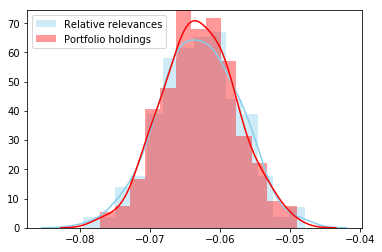

In [8]:
sns.distplot(rel_relevances1 , color="skyblue", label="Relative relevances")
sns.distplot(holdings1 , color="red", label="Portfolio holdings")
plt.legend()

Repeating the same for the second network:

C:\Users\Jakub\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jakub\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


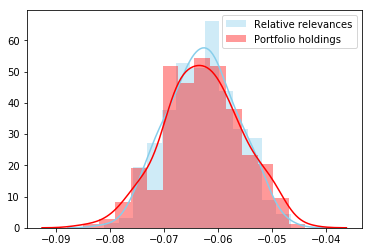

In [9]:
B = adj2_.todense()
B[1]
holdings2 = scipy.linalg.eigh(B, eigvals = (249,249))[1]
rel_relevances2 = scipy.linalg.eigh(np.transpose(B), eigvals = (249,249))[1]
sns.distplot(rel_relevances2 , color="skyblue", label="Relative relevances")
sns.distplot(holdings2 , color="red", label="Portfolio holdings")
plt.legend()

The relevance and portfolio holding distributions are not identical, since the adjacency matrices generated in part b are not symmetric. Components of these vectors are not all non-negative, because of the negative weights we've given some of the connections in the network. But we can see that they all have the same sign - in both cases, r and h components are all negative. This doesn't represent a problem; since these weights are relative.

# Part d)

Rather than using a randomly generated vector r; I thought it would be interesting to take the relevance vector from part c; choosing the first network for my calculations.
There's 250 puzzles to be solved, in addition to the 'outside' option of not being engaged in puzzle-solving, i.e. solving a puzzle with 0 relevance.

These N researchers we're looking at can be thought of as being in a statistical equilibrium in multiple ways, as such a big group of agents influences each of the agents in all sorts of random ways, often exogenous to a particular individual. A large part of such phenomena is captured by the temperature parameter T = 1/Beta

In this context, my favorite argument for modelling this problem as a statistical equilibrium i co-authoring papers. Researchers exchange ideas and work on fractions of problems/papers; removing the need to formulate the problem as just a choice between engaging and not-engaging in solving a particular puzzle.


In [90]:
global rel_relevances
rel_relevances = []
for t in rel_relevances1:
    rel_relevances.append(np.abs(t)[0])
rel_relevances.sort()

sum_ = np.sum(rel_relevances1)
global w_relevances
w_relevances = []
for c in rel_relevances1:
    c = c/sum_
    w_relevances.append(c[0])
w_relevances.sort()
np.sum(w_relevances) # check that they sum up to 1

0.9999999999999999

Let's start with the one-agent partition function. That would be summing Exp(B*sqrt(ri)) over all i(components of the relative-relevance vector) for player J
    The partition function is then the Nth power of the one-agent partition function. We add the 1 since there's also the choice of solving no puzzles; reflected by adding another element = 0 to the relative relevance vector, and exp(B*0) = 1

In [269]:
from sympy import *
B = Symbol('B')
i =  Symbol('i')
N =  Symbol('N')
T = Symbol('T')

T = 1/B
global one_agent
#one_agent = 1+sum([exp(B*(np.sqrt(relevance))) for relevance in w_relevances])
one_agent = 1+sum([exp(B*(np.sqrt(relevance))) for relevance in w_relevances])
global partition_function
partition_function = product(one_agent, (i,1,N))

In [82]:
global helmholtz_u
helmholtz_u = (1/B)*log(partition_function) #simplify((1/B)*log(partition_function))

Then we can compute the set of probabilities an agent (any particular one, since they're all identical by assumption) has of engaging with the set of puzzles from our network. Let's do this for researcher R

In [281]:
global prob_R
prob_R = []
rel_relevances.append(0)
rel_relevances.sort()
for relevance in w_relevances:#for relevance in w_relevances:
    prob_engaging = exp(B*sqrt(relevance))/one_agent
    prob_R.append(prob_engaging)
probscheck = []

prob_R = prob_R[:251]
rel_relevances = w_relevances[:251]
#print rel_relevances[-1]
#print prob_R[-1].evalf(subs = {B: 0.25})

for i in range(len(prob_R)):
    t = prob_R[i].evalf(subs = {B: 1.05})
    probscheck.append(t)


C:\Users\Jakub\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


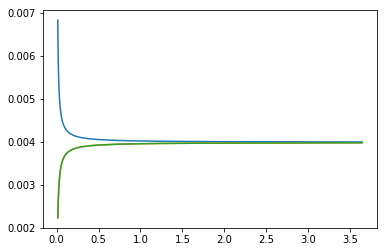

C:\Users\Jakub\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


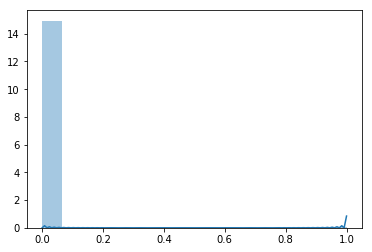

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
e = prob_R[-1]
e_ = prob_R[0]
e__ = prob_R[100]

Beta = np.linspace(0,70, 256)#np.linspace(0,5, 256)
temp = []
prob_puzzle1 = []
prob_puzzle2 = []
prob_puzzle3 = []
for b in Beta:
    el = e.evalf(subs = {B: b})
    e2 = e_.evalf(subs = {B: b})
    e3 = e_.evalf(subs = {B: b})
    prob_puzzle1.append(el)
    prob_puzzle2.append(e2)
    prob_puzzle3.append(e2)
    
    temp.append(1/b)
    
plt.plot(temp,prob_puzzle1)
plt.plot(temp,prob_puzzle2)
plt.plot(temp,prob_puzzle3)
plt.show()

distr_ = []
for i in range(len(prob_R)):
    t = prob_R[i].evalf(subs = {B:10000000})
    distr_.append(round(t,4))
    
sns.distplot(distr_)













Above, we see the choice probabilities visualized, witch choice probabilities on the vertical axis, and economic temperature on the vertical one. The look of that chart is slightly unfortunate (confused me at first about whether I obtained a correct solution), making it seem that the blue choice probability starts at [0,0.007]. That blue line corresponds to the probability choice of the most relevant puzzle(I sorted the relevance list before) and starts at [0,1], something that the histogram of choice probabilities evaluated at arbitrarily large B(Temperature close to 0) confirms, note the little 'kink' at 1.

A less mechanical way of looking at this would be to say that at zero temperature, only the most relevant puzzle from network 1 is being solved. With temperature increasing, we can see the two lines converge quickly, showing that the 'disorder' in our community quickly makes solving each puzzle equally likely. We can check that we've included everything by recognizing that 0.004*250 = 1; i.e we've included every choice.

# Part e)

I find it helpful to look at the research process as a one large decision function (final node for us), which itself is a function of incoming links, them being also functions of their incoming links, etc. So, to arrive at a conclusion about how, say some biological system (the set of all n-step connections) behaves, we traditionally model the problem in a 'forward' way, meaning the causation is attributed in the direction towards the final node.

The knowledge created as the result of the research process however, influences the nodes it was created from as well, especially when talking about empirical research. An example of this design would be a recurrent neural net - a deep learning algorithm with feedback loops designed for this very purpose - the end outputs (final nodes) influence the previous ones that feed into them. Object tracking makes great use of this as the previous frame of a video is a great indication of the structure of the next frame.


In [290]:
net1 = adj_.todense()
net2 = adj2_.todense()
def symmetrize():
    for i in range(250):
        for m in range(250):
            if i>m:
                net1[i,m] = net1[m,i]
                net2[i,m] = net2[m,i]
symmetrize()
#print net1 == np.transpose(net1) # to test if symmetrized properly


In [291]:
paradigm1_net1 = scipy.linalg.eigh(net1, eigvals = (249,249))[1]
paradigm2_net1 = scipy.linalg.eigh(net1, eigvals = (248,248))[1]
paradigm1_net2 = scipy.linalg.eigh(net2, eigvals = (249,249))[1]
paradigm2_net2 = scipy.linalg.eigh(net2, eigvals = (248,248))[1]
global n1
global n2
n1 = nx.from_numpy_matrix(net1)
n2 = nx.from_numpy_matrix(net2)
global pos
pos = nx.spring_layout(n1)
global weights11
global weights21
global weights12
global weights22
weights11 = []
weights21 = []
weights12 = []
weights22 = []

for i in range(len(paradigm2_net2)):
    if paradigm1_net1[i]>0:
        weights11.append(1)
    else:
        weights11.append(2)
    if paradigm2_net1[i]>0:
        weights21.append(1)
    else:
        weights21.append(2)
    
    if paradigm1_net2[i]>0:
        weights12.append(1)
    else:
        weights12.append(2)
    
    if paradigm2_net2[i]>0:
        weights22.append(1)
    else:
        weights22.append(2)


Let's start by paradigm 1 of network 1 (m = 2, N=250). We see all nodes colored according to the signs of the components of the eigenvector corresponding to the largest eigenvalue

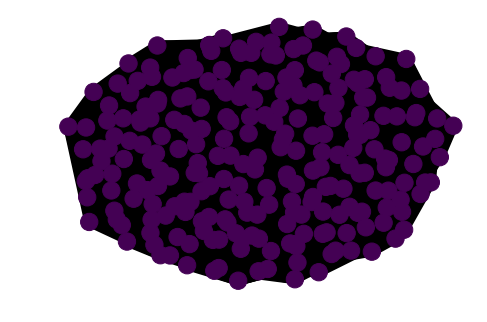

In [292]:
 
nx.draw(n1, pos,node_color=weights11, width=10, edge_cmap=plt.cm.Blues)

The eigenvector of the second largest eigenvalue, however, doesn't have elements which are all of the same sign, indicating disagreement on the paradigm in the community(reserachers assigning opposite relevances):

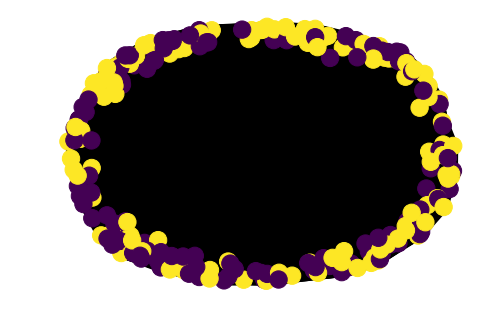

In [288]:
nx.draw(n1, pos,node_color=weights21, width=10.0, edge_cmap=plt.cm.Blues)

Same as the above can be concluded above the other network - though a bit of a different spacing can be observed due to the random nature of the networks, the agreement is visible in the first case and paradigm disagreement in the second one

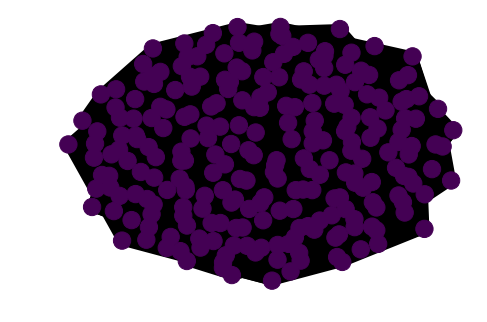

In [163]:
nx.draw(n2, pos,node_color=weights12, width=10.0, edge_cmap=plt.cm.Blues)

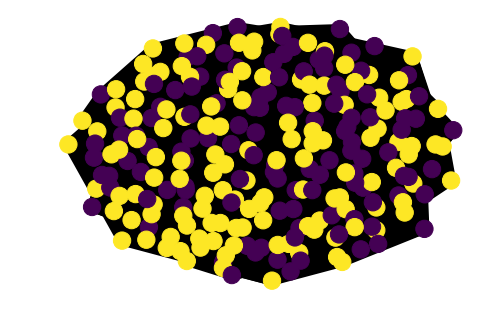

In [164]:
nx.draw(n2, pos,node_color=weights22, width=10.0, edge_cmap=plt.cm.Blues)

We already know that the components of the eigenvector corresponding to the largest eigenvalue are all real valued and of the same sign, hence the agreement on the paradigm.

While it's clear what it means to agree with a paradigm, There's an important distinction between having a mistaken(sigma=0) and an opposing paradigm(sigma=-1). Having a mistaken one, I'd expect an agent to move to the zero relevance puzzle, proportionally to the amount of 'disagreement'.
On the other hand, an opposing paradigm(opposite relevance) can still be made use of. It's what we see in the networks(always the second one, relevance assigned according to the second largest eigenvalue) generated above, That is well captured by the utility function in part f), of the J parameter is sufficiently large (the researcher cares about opinions of others), having the opposing is best responded to by choosing it yourself. Hence the difference in the choice variables.

# Part f)


Question f1:
C1 and CS obtained; I check bellow if I symmetrized the matrix properly

In [299]:
import networkx as nx
import numpy as np
net_f = nx.fast_gnp_random_graph(n=500,p=0.33333, directed = True)
net_f_ = nx.fast_gnp_random_graph(n=15,p=0.33333, directed = True) 
# initialize with n and m
global C1
global CS

C1 = nx.adjacency_matrix(net_f)
def symmetrize(a):
    return (a + a.T )/2+(a - a.T )/2

CS = symmetrize(C1)
global C2
global S2
C2 = nx.adjacency_matrix(net_f_)
CS2 = symmetrize(C2)


#print CS == np.transpose(CS)

In [215]:
arr = []
for i in range(500):
    for y in range(500):
        arr.append(C1[i,y])
print np.sum(arr)
    
    

82961


Question f2:

Mean out-degree of the research network is roughly same for both the symmetrized and original matrix. This indicated that the critical value of economic temperature T* = DinJ/2 would be the same for both communities, assuming the marginal utility J is equal across them. In our particular case, T* = 165.5*J/2, below which consensus starts to occur.(and we can substitute the mean out-degree for in-degree, since they seem to be roughly the same, even in the non-symmetric case))

At least one of the reasons why this is possible is the sheer size of the network - though it's still random, a larger network can be expected to have researchers with a similar number of neighbors. To test this, I created above another instance of the requested network, but with n = 15 rather than 200. There, difference between mean out-degrees of symmetrized an non-symmetrized network was larger, 0.17 compared to the 0.05 for N = 500, even though the mean degree was substantially smaller in magnitude. So it seems, for somewhat intuitive reasons, that consensus can be reached more easily in larger networks. Mechanically, this is because the mean degrees will be close to their expectation in large networks(but not small) by the law of large numbers.

A similar way of looking at this would be to note the hierarchy from the final lecture notes mentions that the mean-field calculation makes most sense for above 8 neighbors, which is more common as the network grows (because number of neighbors and the mean degrees grows also).

In [300]:
nonsym_deg_out = np.dot(np.transpose(C1), C1)
sym_deg_out = np.dot(CS, np.transpose(CS))
nonsym_deg_out1 = np.dot(np.transpose(C2), C2)
sym_deg_out1 = np.dot(CS2, np.transpose(CS2))

print np.mean(diag(nonsym_deg_out1.todense())) - np.mean(diag(sym_deg_out1.todense())) # small net difference
print np.mean(diag(nonsym_deg_out.todense())) - np.mean(diag(sym_deg_out.todense()))
print '-------'
print np.mean(np.diag(np.dot(CS, np.transpose(CS)).todense()))

0.177777777777777
0.0534799999999933
-------
166.5


Question f3:

Variance of the (N = 500) network works out to roughly 70.8. What I first notice is that, one standard deviation being srqt(70.8) = 8.41, we can go more than 7 standard deviations to the left (of the degree distribution) and still have 8 neighbors left on average. So the mean-field calculation is almost definitely valid.
From the risk perspective, large variance would mean reaching the consensus more slowly, as there's more uncertainty, which is essentially what variance defines.
So growing a network, symmetric or not, seems to be helping reach consensus. The m parameter influences this also, in a rather obvious way.

In [301]:
nonsym_deg_out = np.dot(np.transpose(C1), C1)
sym_deg_out = np.dot(CS, np.transpose(CS))
print np.var(diag(nonsym_deg_out.todense()))

276642231139/3906250000
